## Importing libraries....

In [22]:
import os
import pathlib
import numpy as np
import random
import matplotlib.pyplot as plt
import random 
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D,Dense,Dropout,MaxPool2D,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

### Preprocess Data....

In [5]:
# let's walk through the train data
for dir_path,dir_names ,file_names in os.walk("train/"):
    print(f"There are {len(dir_names)} directories and {len(file_names)} images in {dir_path}")

There are 3 directories and 0 images in train/
There are 0 directories and 237 images in train/adidas
There are 0 directories and 237 images in train/nike
There are 0 directories and 237 images in train/converse


In [6]:
# let's walk through the test data
for dir_path,dir_names ,file_names in os.walk("test/"):
    print(f"There are {len(dir_names)} directories and {len(file_names)} images in {dir_path}")

There are 3 directories and 0 images in test/
There are 0 directories and 38 images in test/adidas
There are 0 directories and 38 images in test/nike
There are 0 directories and 38 images in test/converse


In [10]:
# get the classes names for shoes....
data_dir = pathlib.Path("train/")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['adidas' 'converse' 'nike']


In [16]:
# let's make a function for plot a random image....
def plot_random_image(data_dir,target_class):
    
#     this function will plot a random image
    target_folder = data_dir + target_class
    
    random_image = random.sample(os.listdir(target_folder) , 1)
    
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");
    print(f"Shape of the image {img.shape}")
    

Shape of the image (240, 240, 3)


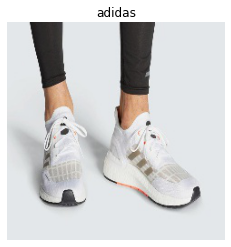

In [18]:
plot_random_image("train/","adidas")

### Data Augmentation...

In [24]:
# set the random seed 
tf.random.set_seed(42)

# directories...
train_dir = "train/"
test_dir = "test/"

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(train_dir,
                                              batch_size=32,
                                              target_size=(224,224),
                                              class_mode = "categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                            batch_size=32,
                                            target_size=(224,224),
                                            class_mode="categorical")

Found 711 images belonging to 3 classes.
Found 114 images belonging to 3 classes.


##